# Inception V3 Development

In [1]:
# Import the Required Packages
import keras
import os
from keras import layers, models, optimizers, regularizers
from keras.applications import InceptionV3, ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data Loading

In [2]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")
img_size = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


## Model

### Feature Extraction

### Underfit

In [13]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))

conv_base.trainable = False
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 74, 74, 32)   96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 74, 74, 32)   0           batch_normalization_189[0][0]    
__________________________________________________________________________________________________
conv2d_190

In [14]:
model = model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 22,983,146
Trainable params: 1,180,362
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [16]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/30
375/375 [==============================] - 87s 232ms/step - loss: 2.3137 - acc: 0.1859 - val_loss: 2.6098 - val_acc: 0.2885
Epoch 2/30
375/375 [==============================] - 79s 212ms/step - loss: 1.8729 - acc: 0.3511 - val_loss: 2.7328 - val_acc: 0.3665
Epoch 3/30
375/375 [==============================] - 75s 201ms/step - loss: 1.7395 - acc: 0.3983 - val_loss: 2.2137 - val_acc: 0.4270
Epoch 4/30
375/375 [==============================] - 74s 198ms/step - loss: 1.6796 - acc: 0.4196 - val_loss: 2.7237 - val_acc: 0.4205
Epoch 5/30
375/375 [==============================] - 74s 196ms/step - loss: 1.6248 - acc: 0.4475 - val_loss: 3.7435 - val_acc: 0.3830
Epoch 6/30
375/375 [==============================] - 73s 196ms/step - loss: 1.5578 - acc: 0.4700 - val_loss: 3.1889 - val_acc: 0.4540
Epoch 7/30
375/375 [==============================] - 74s 196ms/step - loss: 1.5296 - acc: 0.4831 - val_loss: 2.5818 - val_acc: 0.4720
Epoch 8/30
375/375 [==============================] - 7

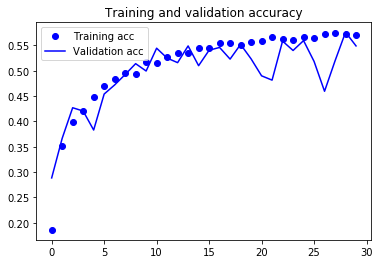

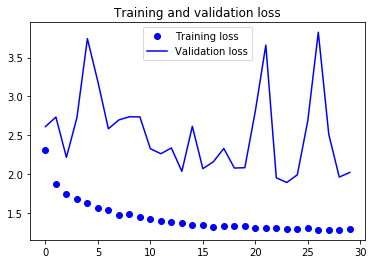

In [17]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Overfit

In [18]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))

conv_base.trainable = False
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 74, 74, 32)   96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 74, 74, 32)   0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [19]:
model = model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total params: 40,688,426
Trainable params: 18,885,642
Non-trainable params: 21,802,784
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [21]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/30
375/375 [==============================] - 99s 264ms/step - loss: 4.8388 - acc: 0.2984 - val_loss: 3.4707 - val_acc: 0.4195
Epoch 2/30
375/375 [==============================] - 86s 230ms/step - loss: 1.6899 - acc: 0.4451 - val_loss: 2.9965 - val_acc: 0.4735
Epoch 3/30
375/375 [==============================] - 87s 231ms/step - loss: 1.5607 - acc: 0.4891 - val_loss: 4.1474 - val_acc: 0.4140
Epoch 4/30
375/375 [==============================] - 89s 237ms/step - loss: 1.5002 - acc: 0.5131 - val_loss: 3.5215 - val_acc: 0.5110
Epoch 5/30
375/375 [==============================] - 89s 239ms/step - loss: 1.5049 - acc: 0.5148 - val_loss: 3.2394 - val_acc: 0.5260
Epoch 6/30
375/375 [==============================] - 83s 221ms/step - loss: 1.4723 - acc: 0.5301 - val_loss: 2.9529 - val_acc: 0.5275
Epoch 7/30
375/375 [==============================] - 94s 251ms/step - loss: 1.4254 - acc: 0.5340 - val_loss: 3.4447 - val_acc: 0.5190
Epoch 8/30
375/375 [==============================] - 8

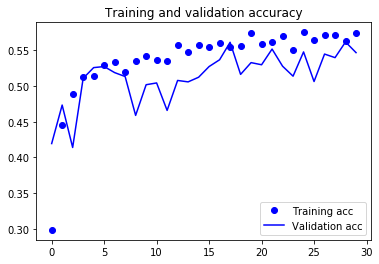

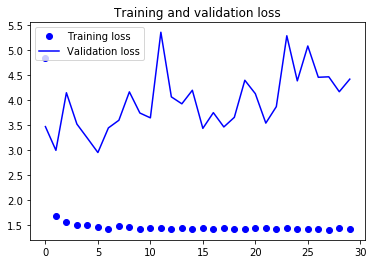

In [22]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine Tuning

### Mixed 7

In [26]:
# InceptionV3 pre-trained model
conv_base_7 = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base_7.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 74, 74, 32)   96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 74, 74, 32)   0           batch_normalization_377[0][0]    
__________________________________________________________________________________________________
conv2d_378

In [27]:
conv_base_7.trainable = True

set_trainable = False

for layer in conv_base_7.layers:
    if layer.name == "mixed7":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [28]:
model = models.Sequential()
model.add(conv_base_7)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               9437696   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 31,245,610
Trainable params: 22,254,730
Non-trainable params: 8,990,880
_________________________________________________________________


In [47]:
conv_base_7.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 74, 74, 32)   96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 74, 74, 32)   0           batch_normalization_377[0][0]    
__________________________________________________________________________________________________
conv2d_378

In [29]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/30
375/375 [==============================] - 106s 282ms/step - loss: 2.2890 - acc: 0.4864 - val_loss: 1.8175 - val_acc: 0.6340
Epoch 2/30
375/375 [==============================] - 91s 244ms/step - loss: 1.9183 - acc: 0.5944 - val_loss: 1.6035 - val_acc: 0.6310
Epoch 3/30
375/375 [==============================] - 92s 247ms/step - loss: 1.7305 - acc: 0.6308 - val_loss: 1.5758 - val_acc: 0.6570
Epoch 4/30
375/375 [==============================] - 94s 250ms/step - loss: 1.6804 - acc: 0.6488 - val_loss: 2.7154 - val_acc: 0.5740
Epoch 5/30
375/375 [==============================] - 97s 260ms/step - loss: 1.6480 - acc: 0.6593 - val_loss: 3.5946 - val_acc: 0.5740
Epoch 6/30
375/375 [==============================] - 100s 267ms/step - loss: 1.6230 - acc: 0.6759 - val_loss: 4.8792 - val_acc: 0.5140
Epoch 7/30
375/375 [==============================] - 95s 253ms/step - loss: 1.5502 - acc: 0.6949 - val_loss: 2.1483 - val_acc: 0.6485
Epoch 8/30
375/375 [==============================] -

### Validation Accuracy Results
Average: 0.6475  
Highest: 0.7035  
Lowest: 0.5140  

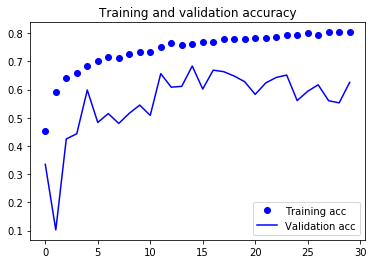

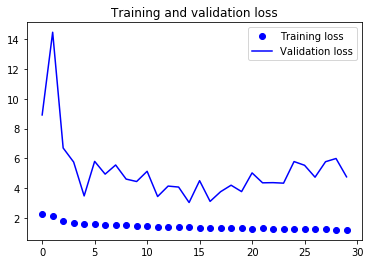

In [36]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mixed 6

In [30]:
# InceptionV3 pre-trained model
conv_base_6 = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base_6.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, 74, 74, 32)   96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 74, 74, 32)   0           batch_normalization_471[0][0]    
__________________________________________________________________________________________________
conv2d_472

In [31]:
conv_base_6.trainable = True

set_trainable = False

for layer in conv_base_6.layers:
    if layer.name == "mixed6":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [32]:
conv_base_6.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, 74, 74, 32)   96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, 74, 74, 32)   0           batch_normalization_471[0][0]    
__________________________________________________________________________________________________
conv2d_472

__________________________________________________________________________________________________
activation_531 (Activation)     (None, 7, 7, 192)    0           batch_normalization_531[0][0]    
__________________________________________________________________________________________________
activation_534 (Activation)     (None, 7, 7, 192)    0           batch_normalization_534[0][0]    
__________________________________________________________________________________________________
activation_539 (Activation)     (None, 7, 7, 192)    0           batch_normalization_539[0][0]    
__________________________________________________________________________________________________
activation_540 (Activation)     (None, 7, 7, 192)    0           batch_normalization_540[0][0]    
__________________________________________________________________________________________________
mixed7 (Concatenate)            (None, 7, 7, 768)    0           activation_531[0][0]             
          

In [33]:
model = models.Sequential()
model.add(conv_base_6)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               9437696   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 31,245,610
Trainable params: 24,394,762
Non-trainable params: 6,850,848
_________________________________________________________________


In [34]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/30
375/375 [==============================] - 139s 370ms/step - loss: 2.3171 - acc: 0.4527 - val_loss: 8.9108 - val_acc: 0.3350
Epoch 2/30
375/375 [==============================] - 121s 323ms/step - loss: 2.1481 - acc: 0.5917 - val_loss: 14.4409 - val_acc: 0.1025
Epoch 3/30
375/375 [==============================] - 115s 307ms/step - loss: 1.8320 - acc: 0.6417 - val_loss: 6.7014 - val_acc: 0.4250
Epoch 4/30
375/375 [==============================] - 113s 300ms/step - loss: 1.7003 - acc: 0.6591 - val_loss: 5.7602 - val_acc: 0.4435
Epoch 5/30
375/375 [==============================] - 110s 294ms/step - loss: 1.6419 - acc: 0.6820 - val_loss: 3.4970 - val_acc: 0.5985
Epoch 6/30
375/375 [==============================] - 106s 282ms/step - loss: 1.6145 - acc: 0.6999 - val_loss: 5.8076 - val_acc: 0.4835
Epoch 7/30
375/375 [==============================] - 107s 287ms/step - loss: 1.5419 - acc: 0.7173 - val_loss: 4.9535 - val_acc: 0.5150
Epoch 8/30
375/375 [===========================

### Validation Accuracy Results 
Average: 0.5378  
Highest: 0.6835  
Lowest: 0.1025   

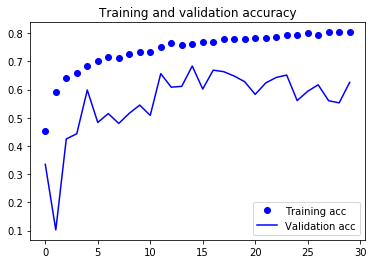

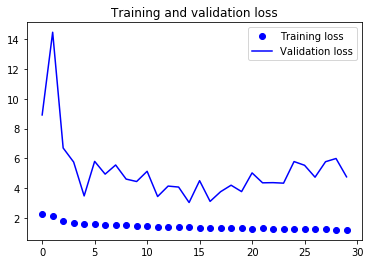

In [35]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mixed 5

In [37]:
# InceptionV3 pre-trained model
conv_base_5 = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base_5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, 74, 74, 32)   96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, 74, 74, 32)   0           batch_normalization_565[0][0]    
__________________________________________________________________________________________________
conv2d_566

In [39]:
conv_base_5.trainable = True

set_trainable = False

for layer in conv_base_5.layers:
    if layer.name == "mixed5":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [48]:
conv_base_5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, 74, 74, 32)   96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, 74, 74, 32)   0           batch_normalization_565[0][0]    
__________________________________________________________________________________________________
conv2d_566

__________________________________________________________________________________________________
activation_596 (Activation)     (None, 7, 7, 128)    0           batch_normalization_596[0][0]    
__________________________________________________________________________________________________
activation_601 (Activation)     (None, 7, 7, 128)    0           batch_normalization_601[0][0]    
__________________________________________________________________________________________________
conv2d_597 (Conv2D)             (None, 7, 7, 128)    114688      activation_596[0][0]             
__________________________________________________________________________________________________
conv2d_602 (Conv2D)             (None, 7, 7, 128)    114688      activation_601[0][0]             
__________________________________________________________________________________________________
batch_normalization_597 (BatchN (None, 7, 7, 128)    384         conv2d_597[0][0]                 
__________

In [40]:
model = models.Sequential()
model.add(conv_base_5)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               9437696   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 31,245,610
Trainable params: 26,084,042
Non-trainable params: 5,161,568
_________________________________________________________________


In [41]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/30
375/375 [==============================] - 165s 441ms/step - loss: 2.8569 - acc: 0.2088 - val_loss: 1.5381 - val_acc: 0.4770
Epoch 2/30
375/375 [==============================] - 142s 378ms/step - loss: 2.1934 - acc: 0.5052 - val_loss: 11.2016 - val_acc: 0.2010
Epoch 3/30
375/375 [==============================] - 137s 364ms/step - loss: 1.8371 - acc: 0.5915 - val_loss: 10.1167 - val_acc: 0.2585
Epoch 4/30
375/375 [==============================] - 131s 350ms/step - loss: 1.8219 - acc: 0.6347 - val_loss: 13.6334 - val_acc: 0.1340
Epoch 5/30
375/375 [==============================] - 132s 351ms/step - loss: 1.6630 - acc: 0.6672 - val_loss: 10.0331 - val_acc: 0.2905
Epoch 6/30
375/375 [==============================] - 141s 377ms/step - loss: 1.5658 - acc: 0.6929 - val_loss: 6.3490 - val_acc: 0.4260
Epoch 7/30
375/375 [==============================] - 133s 354ms/step - loss: 1.5399 - acc: 0.7117 - val_loss: 4.9955 - val_acc: 0.5275
Epoch 8/30
375/375 [========================

### Validation Accuracy Results 
Average: 0.5839 
Highest: 0.7105  
Lowest: 0.2905

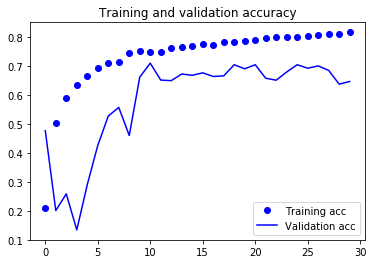

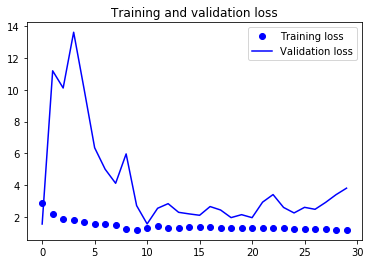

In [42]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mixed 4

In [43]:
# InceptionV3 pre-trained model
conv_base_4 = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base_4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 74, 74, 32)   96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 74, 74, 32)   0           batch_normalization_659[0][0]    
__________________________________________________________________________________________________
conv2d_660

In [44]:
conv_base_4.trainable = True

set_trainable = False

for layer in conv_base_4.layers:
    if layer.name == "mixed4":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [49]:
conv_base_4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 74, 74, 32)   96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 74, 74, 32)   0           batch_normalization_659[0][0]    
__________________________________________________________________________________________________
conv2d_660

activation_695 (Activation)     (None, 7, 7, 128)    0           batch_normalization_695[0][0]    
__________________________________________________________________________________________________
conv2d_691 (Conv2D)             (None, 7, 7, 128)    114688      activation_690[0][0]             
__________________________________________________________________________________________________
conv2d_696 (Conv2D)             (None, 7, 7, 128)    114688      activation_695[0][0]             
__________________________________________________________________________________________________
batch_normalization_691 (BatchN (None, 7, 7, 128)    384         conv2d_691[0][0]                 
__________________________________________________________________________________________________
batch_normalization_696 (BatchN (None, 7, 7, 128)    384         conv2d_696[0][0]                 
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_730 (BatchN (None, 3, 3, 320)    960         conv2d_730[0][0]                 
__________________________________________________________________________________________________
batch_normalization_734 (BatchN (None, 3, 3, 192)    576         conv2d_734[0][0]                 
__________________________________________________________________________________________________
activation_730 (Activation)     (None, 3, 3, 320)    0           batch_normalization_730[0][0]    
__________________________________________________________________________________________________
activation_734 (Activation)     (None, 3, 3, 192)    0           batch_normalization_734[0][0]    
__________________________________________________________________________________________________
max_pooling2d_32 (MaxPooling2D) (None, 3, 3, 768)    0           mixed7[0][0]                     
__________

In [45]:
model = models.Sequential()
model.add(conv_base_4)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_9 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               9437696   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 31,245,610
Trainable params: 27,773,322
Non-trainable params: 3,472,288
_________________________________________________________________


In [50]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/30
375/375 [==============================] - 179s 476ms/step - loss: 3.0979 - acc: 0.1036 - val_loss: 7.0707 - val_acc: 0.0795
Epoch 2/30
375/375 [==============================] - 151s 402ms/step - loss: 2.4889 - acc: 0.3159 - val_loss: 5.7057 - val_acc: 0.3110
Epoch 3/30
375/375 [==============================] - 145s 387ms/step - loss: 2.0395 - acc: 0.4993 - val_loss: 5.9367 - val_acc: 0.3770
Epoch 4/30
375/375 [==============================] - 154s 410ms/step - loss: 1.8535 - acc: 0.5711 - val_loss: 2.0577 - val_acc: 0.5365
Epoch 5/30
375/375 [==============================] - 149s 397ms/step - loss: 1.3668 - acc: 0.6467 - val_loss: 9.9910 - val_acc: 0.2635
Epoch 6/30
375/375 [==============================] - 153s 408ms/step - loss: 1.2840 - acc: 0.6808 - val_loss: 3.8017 - val_acc: 0.5705
Epoch 7/30
375/375 [==============================] - 149s 398ms/step - loss: 1.2310 - acc: 0.6988 - val_loss: 2.8069 - val_acc: 0.5165
Epoch 8/30
375/375 [============================

### Validation Accuracy Results 
Average: 0.5644   
Highest: 0.7335    
Lowest: 0.0795

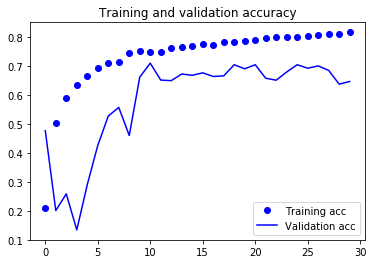

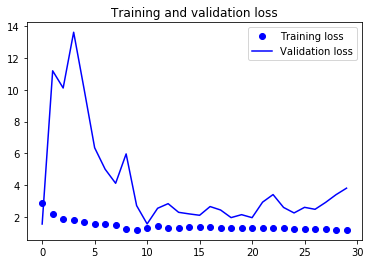

In [46]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Development Models

In [15]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_96[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_97 

In [16]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == "mixed5":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Reshape((12, 12, 128), input_shape=(3, 3, 2048)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              # Default
              optimizer=optimizers.RMSprop(lr=0.0011),
              # Tuning
              # optimizer=optimizers.SGD(lr=0.011, momentum=0.2, nesterov=False),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
reshape_1 (Reshape)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 3, 3, 256)         590080    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [10]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
375/375 [==============================] - 103s 275ms/step - loss: 2.0860 - acc: 0.2381 - val_loss: 2.0425 - val_acc: 0.3305
Epoch 2/30
375/375 [==============================] - 99s 264ms/step - loss: 1.4370 - acc: 0.5139 - val_loss: 1.7475 - val_acc: 0.5545
Epoch 3/30
375/375 [==============================] - 97s 260ms/step - loss: 1.1887 - acc: 0.6012 - val_loss: 3.5510 - val_acc: 0.4870
Epoch 4/30
375/375 [==============================] - 98s 261ms/step - loss: 1.0782 - acc: 0.6609 - val_loss: 1.5158 - val_acc: 0.6075
Epoch 5/30
375/375 [==============================] - 95s 253ms/step - loss: 1.0105 - acc: 0.6925 - val_loss: 1.2957 - val_acc: 0.6755
Epoch 6/30
375/375 [==============================] - 121s 323ms/step - loss: 0.9244 - acc: 0.7243 - val_loss: 1.1724 - val_acc: 0.7190
Epoch 7/30
375/375 [==============================] - 93s 248ms/step - loss: 0.8928 - acc: 0.7

In [5]:
# Test 2
model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(192, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              # Default
              optimizer=optimizers.RMSprop(lr=0.0011),
              # Tuning
              # optimizer=optimizers.SGD(lr=0.011, momentum=0.2, nesterov=False),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 2, 2, 192)         1573056   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 192)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               49408     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 23,427,818
Trainable params: 18,266,250
Non-trainable params: 5,161,568
________________________________________________________

In [6]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
375/375 [==============================] - 98s 262ms/step - loss: 2.5343 - acc: 0.3487 - val_loss: 2.6017 - val_acc: 0.4475
Epoch 2/30
375/375 [==============================] - 90s 241ms/step - loss: 2.0203 - acc: 0.5620 - val_loss: 9.9691 - val_acc: 0.2105
Epoch 3/30
375/375 [==============================] - 90s 239ms/step - loss: 1.7735 - acc: 0.6327 - val_loss: 2.3981 - val_acc: 0.5895
Epoch 4/30
375/375 [==============================] - 100s 267ms/step - loss: 1.7294 - acc: 0.6613 - val_loss: 11.5513 - val_acc: 0.2030
Epoch 5/30
375/375 [==============================] - 105s 279ms/step - loss: 1.4653 - acc: 0.6941 - val_loss: 8.8045 - val_acc: 0.3485
Epoch 6/30
375/375 [==============================] - 92s 246ms/step - loss: 1.6620 - acc: 0.6905 - val_loss: 4.0266 - val_acc: 0.5030
Epoch 7/30
375/375 [==============================] - 90s 240ms/step - loss: 1.6629 - acc: 0.

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
# Test 3
model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(384, activation='relu', kernel_regularizer=regularizers.l2(0.002), bias_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              # Default
#               optimizer=optimizers.RMSprop(lr=0.0011),
              # Tuning
              optimizer=optimizers.SGD(lr=0.012, momentum=0.15, nesterov=False),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 1, 1, 64)          1179712   
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               24960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               73920     
___________________________

In [6]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40
375/375 [==============================] - 91s 243ms/step - loss: 2.3080 - acc: 0.4459 - val_loss: 2.1679 - val_acc: 0.5555
Epoch 2/40
375/375 [==============================] - 84s 225ms/step - loss: 1.7844 - acc: 0.6289 - val_loss: 1.8192 - val_acc: 0.6195
Epoch 3/40
375/375 [==============================] - 88s 235ms/step - loss: 1.5926 - acc: 0.6896 - val_loss: 1.6064 - val_acc: 0.6805
Epoch 4/40
375/375 [==============================] - 90s 239ms/step - loss: 1.4552 - acc: 0.7251 - val_loss: 1.5083 - val_acc: 0.7110
Epoch 5/40
375/375 [==============================] - 89s 239ms/step - loss: 1.3701 - acc: 0.7460 - val_loss: 1.4490 - val_acc: 0.7210
Epoch 6/40
375/375 [==============================] - 90s 241ms/step - loss: 1.2955 - acc: 0.7615 - val_loss: 1.5141 - val_acc: 0.7100
Epoch 7/40
375/375 [==============================] - 91s 243ms/step - loss: 1.2186 - acc: 0.784

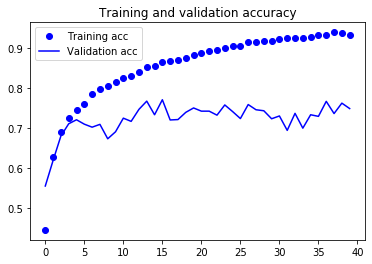

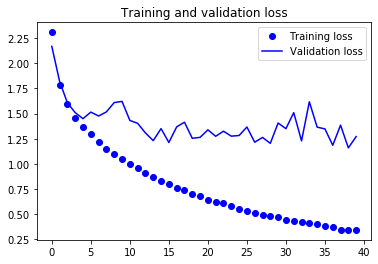

In [17]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Test 4
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(384, activation='relu', kernel_regularizer=regularizers.l2(0.005), bias_regularizer=regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adadelta(lr=1.2, rho=0.94),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 384)               7078272   
_________________________________________________________________
dropout_3 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 192)               73920     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1930      
Total params: 28,956,906
Trainable params: 23,795,338
Non-trainable params: 5,161,568
________________________________________________________

In [ ]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/40
750/750 [==============================] - 154s 206ms/step - loss: 2.9860 - acc: 0.2808 - val_loss: 2.5729 - val_acc: 0.4600
Epoch 2/40
750/750 [==============================] - 149s 198ms/step - loss: 1.4986 - acc: 0.5263 - val_loss: 1.2867 - val_acc: 0.6340
Epoch 3/40
750/750 [==============================] - 151s 202ms/step - loss: 1.3395 - acc: 0.5851 - val_loss: 2.3837 - val_acc: 0.4985
Epoch 4/40
750/750 [==============================] - 154s 206ms/step - loss: 1.2106 - acc: 0.6421 - val_loss: 2.2215 - val_acc: 0.5780
Epoch 5/40
750/750 [==============================] - 153s 204ms/step - loss: 1.1526 - acc: 0.6636 - val_loss: 1.7162 - val_acc: 0.6425
Epoch 6/40
750/750 [==============================] - 155s 207ms/step - loss: 1.0748 - acc: 0.6912 - val_loss: 1.3305 - val_acc: 0.7055
Epoch 7/40
750/750 [==============================] - 162s 217ms/step - loss: 1.0529 - acc: 0.7013 - val_loss: 1.3935 - val_acc: 0.7135
Epoch 8/40
750/750 [============================

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
# Save the Model
model.save('food_classifier_inceptionv3.h5')

In [8]:
model.load_weights('food_classifier_inceptionv3.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 1.3233981722593307
test_acc: 0.7199999964237214


### Final Development

In [3]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))

conv_base.trainable = False
conv_base.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
co

In [4]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == "mixed7":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.002,l2=0.005)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=100)

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adadelta(lr=0.03),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total para

In [8]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/40
375/375 [==============================] - 88s 236ms/step - loss: 77.1570 - acc: 0.7523 - val_loss: 60.9020 - val_acc: 0.6790
Epoch 2/40
375/375 [==============================] - 81s 215ms/step - loss: 47.3810 - acc: 0.7803 - val_loss: 37.8406 - val_acc: 0.7000
Epoch 3/40
375/375 [==============================] - 78s 209ms/step - loss: 30.1856 - acc: 0.7813 - val_loss: 25.3453 - val_acc: 0.7125
Epoch 4/40
375/375 [==============================] - 80s 212ms/step - loss: 20.7005 - acc: 0.7916 - val_loss: 18.3912 - val_acc: 0.6910
Epoch 5/40
375/375 [==============================] - 79s 211ms/step - loss: 15.0832 - acc: 0.8004 - val_loss: 13.9798 - val_acc: 0.6855
Epoch 6/40
375/375 [==============================] - 80s 214ms/step - loss: 11.5810 - acc: 0.7968 - val_loss: 11.2950 - val_acc: 0.6800
Epoch 7/40
375/375 [==============================] - 81s 217ms/step - loss: 9.3061 - acc: 0.7991 - val_loss: 9.1813 - val_acc: 0.7040
Epoch 8/40
375/375 [=======================

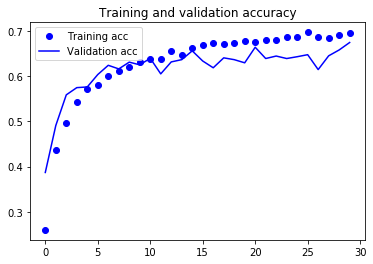

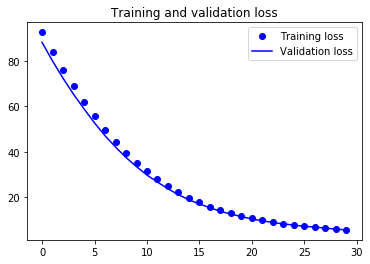

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Final Development 2

In [3]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))

conv_base.trainable = False
conv_base.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
co

In [4]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == "mixed4":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

conv2d_94 (Conv2D)              (None, 3, 3, 192)    393216      average_pooling2d_9[0][0]        
__________________________________________________________________________________________________
batch_normalization_86 (BatchNo (None, 3, 3, 320)    960         conv2d_86[0][0]                  
__________________________________________________________________________________________________
activation_88 (Activation)      (None, 3, 3, 384)    0           batch_normalization_88[0][0]     
__________________________________________________________________________________________________
activation_89 (Activation)      (None, 3, 3, 384)    0           batch_normalization_89[0][0]     
__________________________________________________________________________________________________
activation_92 (Activation)      (None, 3, 3, 384)    0           batch_normalization_92[0][0]     
__________________________________________________________________________________________________
activation

In [6]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 1, 1, 128)         2359424   
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
___________________________

In [7]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
375/375 [==============================] - 94s 251ms/step - loss: 16.4108 - acc: 0.1448 - val_loss: 16.2541 - val_acc: 0.1825
Epoch 2/50
375/375 [==============================] - 84s 225ms/step - loss: 16.0930 - acc: 0.2412 - val_loss: 15.8219 - val_acc: 0.3500
Epoch 3/50
375/375 [==============================] - 85s 226ms/step - loss: 15.7472 - acc: 0.3355 - val_loss: 15.4765 - val_acc: 0.4300
Epoch 4/50
375/375 [==============================] - 89s 238ms/step - loss: 15.3937 - acc: 0.4240 - val_loss: 15.1099 - val_acc: 0.4825
Epoch 5/50
375/375 [==============================] - 88s 235ms/step - loss: 15.0799 - acc: 0.4641 - val_loss: 14.7590 - val_acc: 0.5665
Epoch 6/50
375/375 [==============================] - 90s 240ms/step - loss: 14.7829 - acc: 0.5143 - val_loss: 14.5492 - val_acc: 0.5655
Epoch 7/50
375/375 [==============================] - 97s 260ms/step - loss: 14.5378

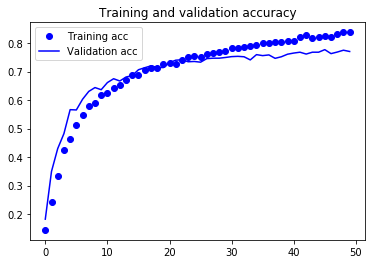

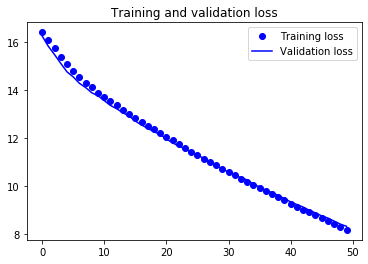

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# Save the Model
model.save('food_classifier_inceptionv3_final.h5')

In [12]:
model.load_weights('food_classifier_inceptionv3_final.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 19.769285888671874
test_acc: 0.7699999976158142


In [10]:
# Load the food list (in alphabetical order)
with open('19.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    if item.strip('\n') != '':
        food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'beet_salad', 'croque_madame', 'frozen_yogurt', 'grilled_cheese_sandwich', 'grilled_salmon', 'lobster_bisque', 'omelette', 'red_velvet_cake', 'risotto']


In [11]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

def resnet_image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image_array = preprocess_input(image_array)
    return preprocessed_image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

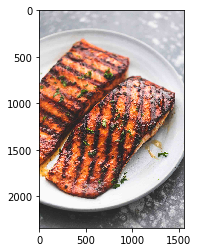

The prediction is:  grilled_salmon 

    beef_carpaccio    beet_salad  croque_madame  frozen_yogurt  \
0    3.223992e-09  3.830771e-08   7.162408e-08   1.524278e-09   

   grilled_cheese_sandwich  grilled_salmon  lobster_bisque  omelette  \
0                 0.000003        0.999992    1.628419e-10  0.000006   

   red_velvet_cake       risotto  
0     1.380189e-08  6.958957e-09  


In [12]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'salmon1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)